# Installing PreRequired Libraries

In [77]:
!pip install pandas 
!pip install numpy 
!pip install  matplotlib
!pip install seaborn
!pip install scikit-learn

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
plt.style.use('default')

# Importing DataSet

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

# DataSet Introduction


##  Dataset Name : Titanic 

# EDA

# 1.1 (Finding Null Values and Removing It)

In [3]:
print("Total Null Values in The DataSet")
df.isnull().sum()


Total Null Values in The DataSet


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:

print("Now The DataSet After Removing Null Value")
df = df.dropna(subset=['Age', 'Cabin'])
df.isnull().sum()


Now The DataSet After Removing Null Value


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

# 1.2 Looking for Duplicate Entry (Values)

In [5]:
Duplicate_rows=df.duplicated().sum()
print("Total Number of Duplicated Rows :",Duplicate_rows)

Total Number of Duplicated Rows : 0


# 1.3 Exploring Statistics Behaviour of Numerical Features

In [6]:
""" This Function Tells Us about the Statistics of Dataset like Total Number of Rows(Enteries),Max Value,
    Min Value ,standard Divation And Quartiles """
print("Summary Satistics For the Data")
df.describe()


Summary Satistics For the Data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,455.264865,0.675676,1.189189,35.829297,0.459459,0.470270,78.696712
std,248.948244,0.469392,0.512763,15.679356,0.642456,0.752122,75.931898
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.000000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,680.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


# 1.4 Features Correlation Analysis

In [7]:
"""This Function Shows Realtionship of Each Feature With all the Other Features in the Dataset"""
print("Features Correlation Analysis")
df.corr(numeric_only=True)


Features Correlation Analysis


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.145894,-0.087759,0.042758,-0.081876,-0.050419,0.029345
Survived,0.145894,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019
Pclass,-0.087759,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069
Age,0.042758,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542
SibSp,-0.081876,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492
Parch,-0.050419,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783
Fare,0.029345,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000


# 1.5 Relative Frequencies For Catogorical Features

In [8]:
"""This Methods Shows Us Count for Each Age Categories Like
36 Occurs 11 Time and So on """
print(df['Age'].value_counts())
print("Percentage Wise Relative Frequencies")
print(df['Age'].value_counts(normalize=True))  


36.0    11
24.0     9
35.0     6
19.0     6
38.0     5
        ..
1.0      1
41.0     1
45.5     1
3.0      1
26.0     1
Name: Age, Length: 63, dtype: int64
Percentage Wise Relative Frequencies
36.0    0.059459
24.0    0.048649
35.0    0.032432
19.0    0.032432
38.0    0.027027
          ...   
1.0     0.005405
41.0    0.005405
45.5    0.005405
3.0     0.005405
26.0    0.005405
Name: Age, Length: 63, dtype: float64


In [9]:
"""This Method count Cabins of Each Category"""
print(df['Cabin'].value_counts())
print("Percentage Wise Relative Frequencies")
print(df['Cabin'].value_counts(normalize=True)) 

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: Cabin, Length: 134, dtype: int64
Percentage Wise Relative Frequencies
G6             0.021622
C23 C25 C27    0.021622
B96 B98        0.021622
F2             0.016216
C22 C26        0.016216
                 ...   
C91            0.005405
C124           0.005405
C32            0.005405
E34            0.005405
C148           0.005405
Name: Cabin, Length: 134, dtype: float64


In [10]:
"""This Method shows us Counts for Each Gender"""
print(df['Sex'].value_counts())
print("Percentage Wise Relative Frequencies")
print(df['Sex'].value_counts(normalize=True)) 

male      95
female    90
Name: Sex, dtype: int64
Percentage Wise Relative Frequencies
male      0.513514
female    0.486486
Name: Sex, dtype: float64


In [11]:
"""This Methods Shows Us the Survival Rate through out the Dataset"""
print(df['Survived'].value_counts())
print("Percentage Wise Relative Frequencies")
print(df['Survived'].value_counts(normalize=True)) 

1    125
0     60
Name: Survived, dtype: int64
Percentage Wise Relative Frequencies
1    0.675676
0    0.324324
Name: Survived, dtype: float64


#  Histograms,PieCharts,Barcharts,Scatter Plot,Line Plot and Violinplot

# 1 Histogram

In [12]:
def Histogram(input_feature,title,xlabel,ylabel,numofclasses):
    plt.figure(figsize=(5,5))  
    plt.hist(input_feature, bins=5, color='skyblue', edgecolor='black')  
    plt.title(title)  
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.grid(axis='y', alpha=0.75)  
    plt.xticks(range(0,numofclasses))  
    plt.show() 

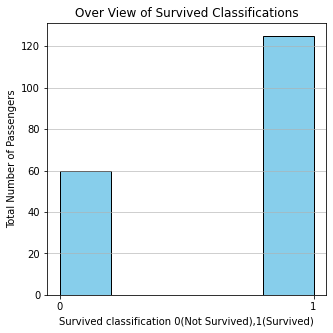

In [13]:
"""
Below Histogram Shows the Number of Peoples That are Survived or Not ,0 Represent that the Passenger is Not Survived
1 Represent that the Passenger is Survived.After Preprocessing the Data .Below Histogram Shows that there are roughly
60 people that are Not Survived and there are Roughly 120+ Peoples that are Survived in the Titanic Disaster

"""

Histogram(df['Survived'],"Over View of Survived Classifications","Survived classification 0(Not Survived),1(Survived)","Total Number of Passengers",2)

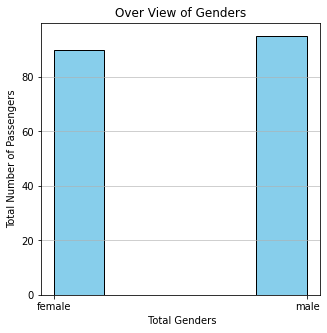

In [14]:
"""
Below Histogram Shows the Genders of the Peoples in the Dataset.After Preprocessing the Data there are 80+ Peoples 
that's Falls under Female Class and 90+ Peoples that's Falls under the Male Class
"""

Histogram(df["Sex"],"Over View of Genders"," Total Genders","Total Number of Passengers",2)

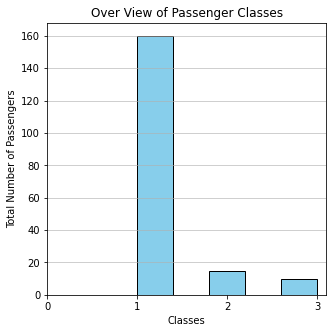

In [15]:
"""
Below Histogram Shows the Passenger class in the Ship.There are 3 Values for Pclass
1)First Class (Passengers With A lot of Resources usually wealthier People)
2)Second Class (Passenger With Intermediate Resources)
3)Third Class (Passenger With Less Resources as Compared To other Passengers in the Ship)

Below Histogram Shows that there are 160  Passengers that's Belong to First Class in the ship,15+ Peoples belong to Second
class in the Ship and 5+ Passengers Belong to 3 class in the Ship.
"""
Histogram(df["Pclass"],"Over View of Passenger Classes","Classes","Total Number of Passengers",4)

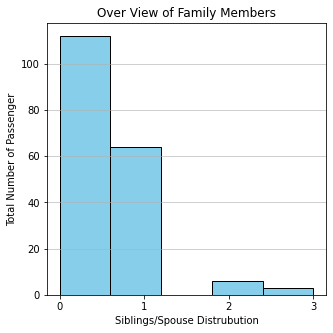

In [16]:
"""
Below Feature Shows the Family Members RealtionShip in the Ship.Either Siblings or (wife /Husband) of Passenger

1)0 means that The Passenger is Travelling Alone With No Family Members
2)1 Represent that the Passenger is travelling with 1 Family Member .It maybe the Passenger sibling or Spouse
3)2 Represent that the Passenger is travelling with 2 Family Members It maybe the Passenger siblings or Spouse
4)3 Represent that the Passenger is travelling with 3 Family Members It maybe the Passenger siblings or Spouse

Below Histogram Shows that there are 100+ passengers that are Travelling Alone With No Family Members,60+ Passengers
with 1 Family Member ,Below 10+ Passenger have Either 2 or 3 family Members
"""

Histogram(df["SibSp"],"Over View of Family Members","Siblings/Spouse Distrubution","Total Number of Passenger",4)


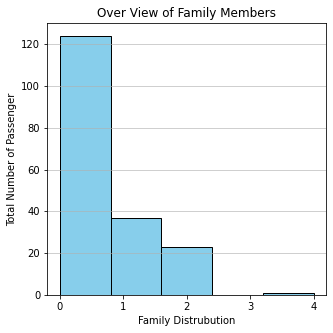

In [17]:
"""
This Feature Shows the Family Realtionships
1)0 Means the Passenger is travelling without children or Parent.
2)1 Means the Passenger is travelling with 1 children or Parent.
3)2 Means the Passenger is travelling with 2 children or Parents.Its maybe 1 parent and 1 Children or vicversa.
4)4 Means the Passenger is travelling with 4 Family Members.

Below Histogram Shows that there 120+ Passengers that are Travelling alone ,30+ Passenger Travelling with 1 
Family Member,20+ Passenger with 2 Family Members and Nearly 5 Passengers With 4 Family Members

"""
Histogram(df["Parch"],"Over View of Family Members","Family Distrubution","Total Number of Passenger",5)

# 2 Pie Chart

In [18]:

def Piecharts(input_featurename,titlename):
    counts = input_featurename.value_counts()
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(titlename)
    plt.show()

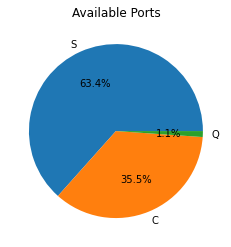

In [19]:
"""
Embarked Feature Shows the port from Which The Passengers Boarded into Titanic.
C: Cherbourg, France
Q: Queenstown (now Cobh), Ireland
S: Southampton, England

Below Pie Chart Shows That 63.4% passengers are Boarded into titanic From Southampton, England,35.5% are from Cherbourg ,France and 
1.1% are from Queenstown (Ireland)
"""

Piecharts(df['Embarked'],"Available Ports")

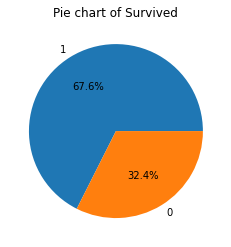

In [20]:
"This Piechart Shows that 67.6% Passengers Survived and 32.4% Passengers didn't Survived"
Piecharts(df["Survived"],"Pie chart of Survived")

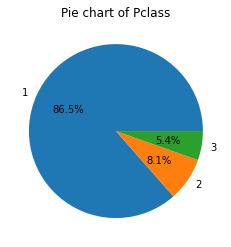

In [21]:
"This Piechart Shows that the 86.5% Passenger are of First Class,8.1% are from Second Class and 5.4% are from third Class "
Piecharts(df["Pclass"],"Pie chart of Pclass")

# Converting Catogrical Features to Numerical Feature for Model training using LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [23]:

df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Cabin']=label_encoder.fit_transform(df['Cabin'])
df['Ticket']=label_encoder.fit_transform(df['Ticket'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])


# 3 Bar Chart 

In [24]:
def Barchart(input_feature1,input_feature2,title,xlabel,ylabel,numberofclasses):
    grouped=df.groupby(input_feature1)[input_feature2].agg(
    Total_passenger_survived="sum",
    Total_passenger="count"
    ).reset_index()
    grouped['Total_passenger_non_survived'] = grouped['Total_passenger'] - grouped['Total_passenger_survived']
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.bar(grouped[input_feature1],grouped['Total_passenger_survived'],color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(0,numberofclasses)) 
    plt.show()
    print(grouped)

In [25]:
def Advance_Barchart(input_feature1, input_feature2, title, xlabel, ylabel, numberofclasses):
    grouped = df.groupby(input_feature1)[input_feature2].agg(
        Total_passenger_survived="sum",
        Total_passenger="count"
    ).reset_index()
#     plt.style.use("dark_background")
    grouped['Total_passenger_non_survived'] = grouped['Total_passenger'] - grouped['Total_passenger_survived']
    plt.figure(figsize=(4, 4))
    plt.title(title)
    plt.bar(grouped[input_feature1], grouped['Total_passenger_non_survived'], color='red', label='Non-Survivors')
    plt.bar(grouped[input_feature1], grouped['Total_passenger_survived'], color='skyblue', label='Survivors', bottom=grouped['Total_passenger_non_survived'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(numberofclasses))  
    plt.legend()
    
    plt.show()
    print(grouped)

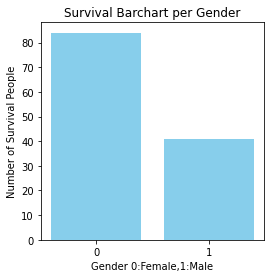

   Sex  Total_passenger_survived  Total_passenger  \
0    0                        84               90   
1    1                        41               95   

   Total_passenger_non_survived  
0                             6  
1                            54  


In [26]:
"""
Below Barchart Shows that 80 + Passenger that are Survived is from Female Gender and 40 Passenger that are Survived
is from Male Gender
"""
Barchart('Sex','Survived',"Survival Barchart per Gender","Gender 0:Female,1:Male","Number of Survival People",2)

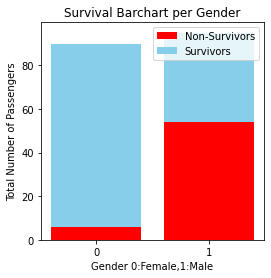

   Sex  Total_passenger_survived  Total_passenger  \
0    0                        84               90   
1    1                        41               95   

   Total_passenger_non_survived  
0                             6  
1                            54  


In [27]:
"""
Below Barchart Shows That There are total 90 Passenger of Female Class out of Which 84 Survived and 6 Not Survived from Natural
Disater
Barchart Also Shows that there are total 95 Passenger of Male Class out of which 41 Survived and 54 Not Surviveed Due to
Natural Disaster
"""
Advance_Barchart('Sex','Survived',"Survival Barchart per Gender","Gender 0:Female,1:Male","Total Number of Passengers",2)

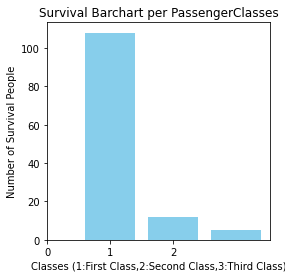

   Pclass  Total_passenger_survived  Total_passenger  \
0       1                       108              160   
1       2                        12               15   
2       3                         5               10   

   Total_passenger_non_survived  
0                            52  
1                             3  
2                             5  


In [28]:
"""
Below Barchart Shows that There are 160 Passenger that are from First Class out of which 108 Survived from Natural Disaster
There are 15 Passengers from second class outof which 12 Passenger Survived. 
There are 10 Passenger from the Third Class out of which 5 Passenger alived.

"""

Barchart('Pclass','Survived',"Survival Barchart per PassengerClasses","Classes (1:First Class,2:Second Class,3:Third Class)","Number of Survival People",3)



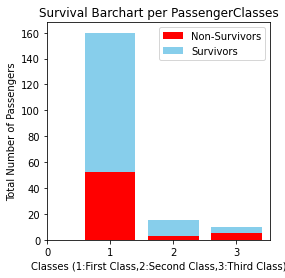

   Pclass  Total_passenger_survived  Total_passenger  \
0       1                       108              160   
1       2                        12               15   
2       3                         5               10   

   Total_passenger_non_survived  
0                            52  
1                             3  
2                             5  


In [29]:
"""
Below Barchart Shows that There are 160 Passenger that are from First Class out of which 108 Survived and 52 Not Survived from Natural Disaster
There are 15 Passengers from second class outof which 12 Passenger Survived and 3 Not Survived. 
There are 10 Passenger from the Third Class out of which 5 Passenger alived and 5 Not Survived.
"""


Advance_Barchart('Pclass','Survived',"Survival Barchart per PassengerClasses","Classes (1:First Class,2:Second Class,3:Third Class)","Total Number of Passengers",4)

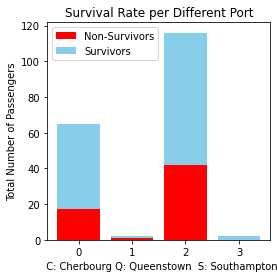

   Embarked  Total_passenger_survived  Total_passenger  \
0         0                        48               65   
1         1                         1                2   
2         2                        74              116   
3         3                         2                2   

   Total_passenger_non_survived  
0                            17  
1                             1  
2                            42  
3                             0  


In [30]:


Advance_Barchart('Embarked','Survived',"Survival Rate per Different Port","  C: Cherbourg Q: Queenstown  S: Southampton","Total Number of Passengers",4)


# 4 Scatter Plot

In [31]:
def Scatterplot(feature1, feature2, color_feature, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df[feature1], df[feature2], c=df[color_feature], cmap='coolwarm', alpha=0.6)
    plt.colorbar(scatter, label='Survived')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


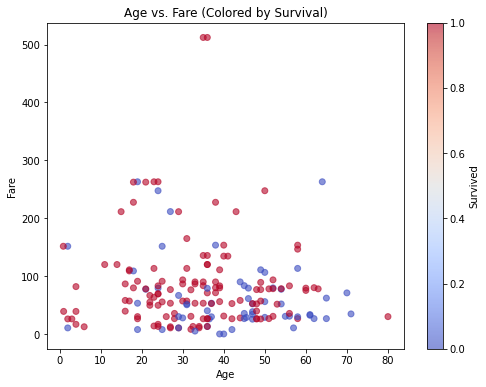

In [32]:
Scatterplot('Age', 'Fare', 'Survived', 'Age vs. Fare (Colored by Survival)', 'Age', 'Fare')

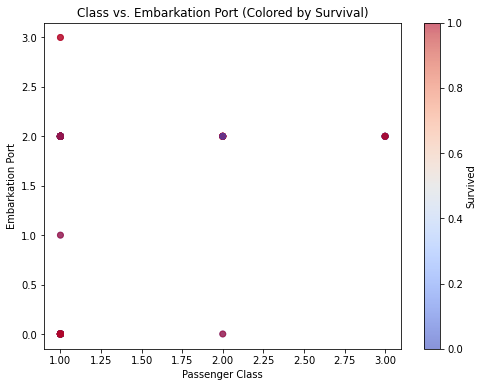

In [33]:
Scatterplot('Pclass', 'Embarked', 'Survived', 'Class vs. Embarkation Port (Colored by Survival)', 'Passenger Class', 'Embarkation Port')


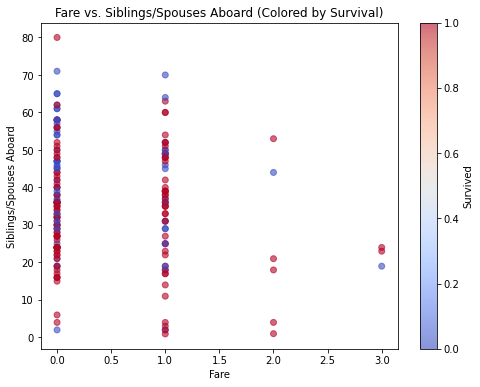

In [34]:
Scatterplot( 'SibSp','Age', 'Survived', 'Fare vs. Siblings/Spouses Aboard (Colored by Survival)', 'Fare', 'Siblings/Spouses Aboard')


# 5 Line Plot

In [35]:
def Lineplot(input_feature1,input_feature2,title,xlabel,ylabel):
#     plt.style.use('dark_background')
    grouped = df.groupby(input_feature1)[input_feature2].agg(
        Total_passenger_survived="sum",
        Total_passenger="count"
    ).reset_index()
    plt.plot(grouped[input_feature1],grouped['Total_passenger_survived'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(grouped)


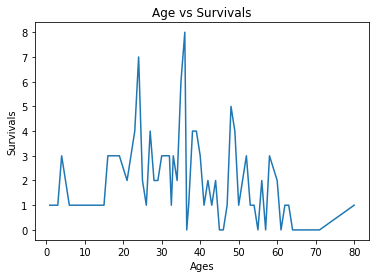

      Age  Total_passenger_survived  Total_passenger
0    0.92                         1                1
1    1.00                         1                1
2    2.00                         1                3
3    3.00                         1                1
4    4.00                         3                3
..    ...                       ...              ...
58  64.00                         0                1
59  65.00                         0                2
60  70.00                         0                1
61  71.00                         0                1
62  80.00                         1                1

[63 rows x 3 columns]


In [36]:
"""
Below lineplot Shows that Highest Survival Rate is from 20 to 60 with peak Value of 8 Survivals.This Shows that the people
With there ages in range from 20 to 60 Has Highest Survival Rate.And the People that Have Ages from 60 onwards has less
Survival Rate.
"""

Lineplot('Age','Survived',"Age vs Survivals","Ages","Survivals")

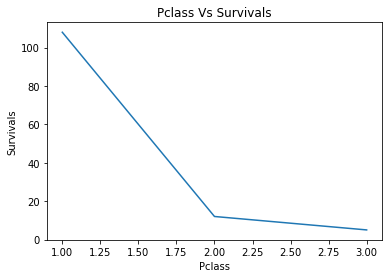

   Pclass  Total_passenger_survived  Total_passenger
0       1                       108              160
1       2                        12               15
2       3                         5               10


In [37]:
"Below Line Plot Shows that the Passenger from First Class Have Highest Survival Rates as Compare to second and Third Class"
Lineplot('Pclass','Survived',"Pclass Vs Survivals","Pclass","Survivals")

# 6 Violinplot


In [38]:
def violinplot(feature1,feature2,title,xlabel,ylabel):
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x=feature1, y=feature2, hue='Sex', split=True, inner="quartile", palette="Set2")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

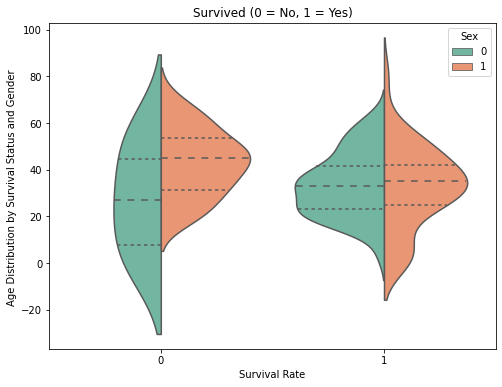

In [39]:
violinplot(df['Survived'],df['Age'],"Survived (0 = No, 1 = Yes)","Survival Rate","Age Distribution by Survival Status and Gender ")

In [40]:
df.drop(columns='PassengerId',inplace=True)

In [41]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,110,71.2833,73,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,32,53.1000,49,2
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,56,51.8625,118,2
10,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,121,16.7000,132,2
11,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,27,26.5500,44,2
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,34,52.5542,92,2
872,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,90,5.0000,30,2
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,39,83.1583,62,0
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,10,30.0000,26,2


## 7 HeatMap

In [42]:

def Heatmap(dataset):
    
    numeric_features = dataset.select_dtypes(include=['float64','int64'])
    
    correlation_matrix = numeric_features.corr()

    plt.figure(figsize=(6,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Titanic Dataset')
    plt.show()



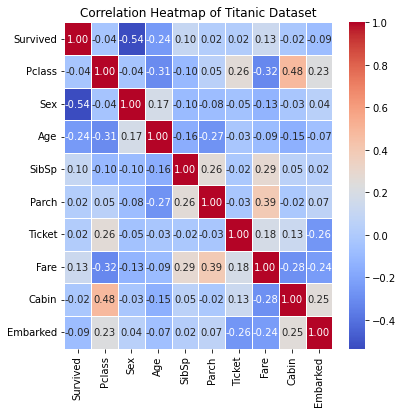

In [43]:
Heatmap(df)

In [47]:
X=df.drop(columns=['Survived','Name'],axis=1)
Y=df['Survived']


## Splitting the Data for Training and Testing 
## 70% Data is for Training and 30% Data is For Testing

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

In [49]:
X_train.shape

(129, 9)

In [50]:
X_test.shape

(56, 9)

# Since it is a Classification Problem So we Will Try Different Different Models And Choose Best from them 

# 1 Logistic Regression

In [51]:
LR=LogisticRegression()

In [52]:
LR.fit(X_train,Y_train)

/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predictions=LR.predict(X_test)

# 1.1 Confusion Matrix

In [54]:
cm=confusion_matrix(Y_test,predictions)
print(cm)

[[11  6]
 [ 8 31]]


## 1.2 Confusion Matrix Display

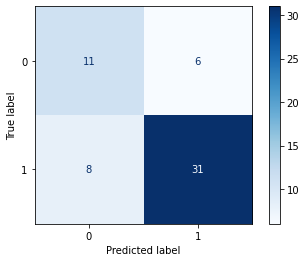

In [55]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

# 1.3 Classifications Report

In [56]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61        17
           1       0.84      0.79      0.82        39

    accuracy                           0.75        56
   macro avg       0.71      0.72      0.71        56
weighted avg       0.76      0.75      0.75        56



# 1.3 HeatMap

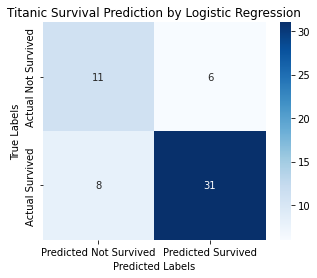

In [57]:

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Titanic Survival Prediction by Logistic Regression")
plt.show()

# 2 Decision Tree Classifier

In [58]:
DTC=DecisionTreeClassifier()

In [59]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [60]:
predictions=DTC.predict(X_test)

# 2.1 Confusion Matrix

In [61]:
cm1=confusion_matrix(Y_test,predictions)
print(cm1)

[[12  5]
 [ 9 30]]


# 2.2 Confusion Matrix Display

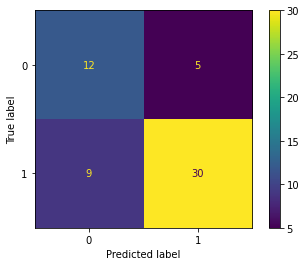

In [62]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()


# 2.3 Classification Report

In [63]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        17
           1       0.86      0.77      0.81        39

    accuracy                           0.75        56
   macro avg       0.71      0.74      0.72        56
weighted avg       0.77      0.75      0.76        56



# 2.4 HeatMap

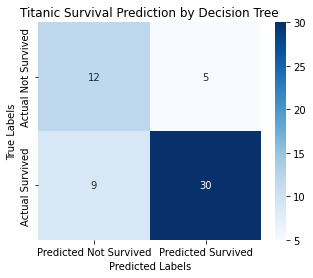

In [64]:

plt.figure(figsize=(5, 4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Titanic Survival Prediction by Decision Tree")
plt.show()

# 3)KNeighborsClassifier

In [65]:
KNC=KNeighborsClassifier()

In [66]:
KNC.fit(X_train,Y_train)

KNeighborsClassifier()

In [67]:
predictions=KNC.predict(X_test)


# 3.1 Confusion Matrix

In [68]:
cm=confusion_matrix(Y_test,predictions)
print(cm)
import seaborn as sns

[[ 3 14]
 [ 8 31]]


# 3.2 Confusion Matrix Display

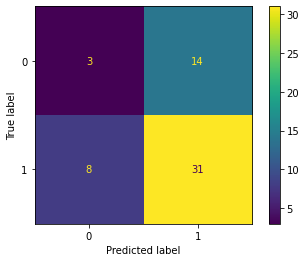

In [69]:
d1=ConfusionMatrixDisplay(cm)
d1.plot()

# 3.3 Classification Report

In [70]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.27      0.18      0.21        17
           1       0.69      0.79      0.74        39

    accuracy                           0.61        56
   macro avg       0.48      0.49      0.48        56
weighted avg       0.56      0.61      0.58        56



# 3.4 HeatMap

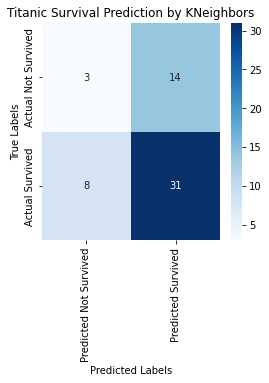

In [71]:

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Titanic Survival Prediction by KNeighbors")
plt.show()
